# Precision Medicine Workshop

Make sure you run the cell below first (`%load_ext rpy2.ipython`). This makes this Colab notebook able to run R in the cells.

In [1]:
%load_ext rpy2.ipython

In [4]:
!git clone https://github.com/ARCLeeds/pm_workshop.git

Cloning into 'pm_workshop'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [5]:
%%R
#Data to read in:
imiss<-read.table(file="pm_workshop/testplink.imiss",header=TRUE)
lmiss<-read.table(file="pm_workshop/testplink.lmiss",header=TRUE)
hetph<-read.table(file="pm_workshop/testplink_ph.het",header=TRUE,sep="\t")
pcaph<-read.table(file="pm_workshop/testplink_ph.eigenvec",header=TRUE,sep="\t")
pca2ph<-read.table(file="pm_workshop/testplinkasian_ph.eigenvec",header=TRUE,sep="\t")
reslog<-read.table(file="pm_workshop/testplinkallWITHCUMPOS.assoc.logistic",header=TRUE)
reslog2<-read.table(file="pm_workshop/testplinkall2WITHCUMPOS.assoc.logistic",header=TRUE)

## First look at how much missingness there is in the data - per marker and per person

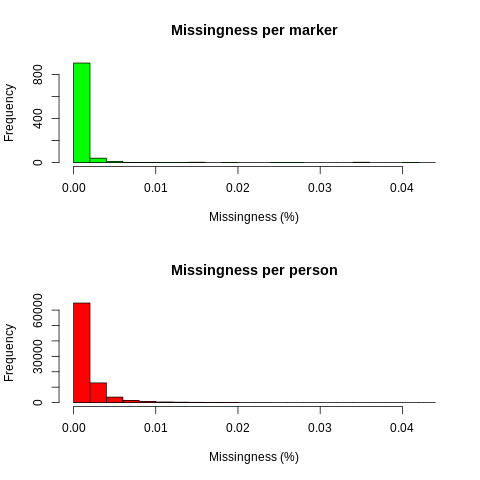

In [6]:
%%R
imiss<-read.table(file="pm_workshop/testplink.imiss",header=TRUE)
lmiss<-read.table(file="pm_workshop/testplink.lmiss",header=TRUE)

par(mfrow=c(2,1))
hist(imiss[,6],xlab="Missingness (%)",breaks=seq(from=0,to=0.044,by=0.002),main="Missingness per marker",col="green")
hist(lmiss[,5],xlab="Missingness (%)",breaks=seq(from=0,to=0.044,by=0.002),main="Missingness per person",col="red")



In [7]:
%%R
#Let's see how many individuals are missing at > 3% of their genetic markers
nrow(imiss[imiss[,6]>0.03,])


[1] 4


In [8]:
%%R
#Let's see how many markers are missing in > 3% of people
nrow(lmiss[lmiss[,5]>0.03,])

[1] 8


In [10]:
%%R
#Everyone carries two copies (alleles) at each genetic variant
#A standard measure of genotype quality is to look at homozygosity - what proportion of genome is the same on both (maternal and paternal) chromosomes
#If genotyping isn't working well then often only one chromosome produces a signal and it looks like this person has a lot of homozygosity

hetph<-read.table(file="pm_workshop/testplink_ph.het",header=TRUE,sep="\t")



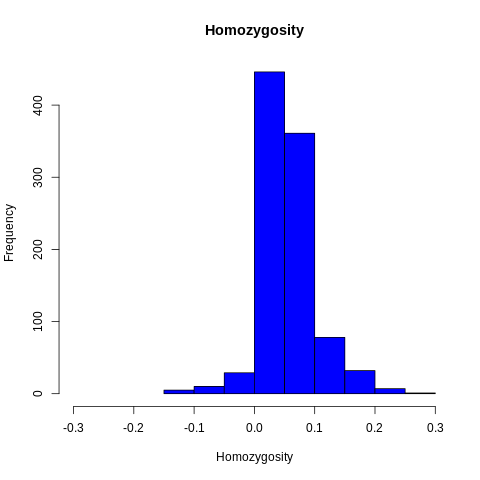

In [12]:
%%R
par(mfrow=c(1,1))
hist(hetph[,6],main="Homozygosity",xlab="Homozygosity",col="blue",xlim=c(-0.3,0.3))

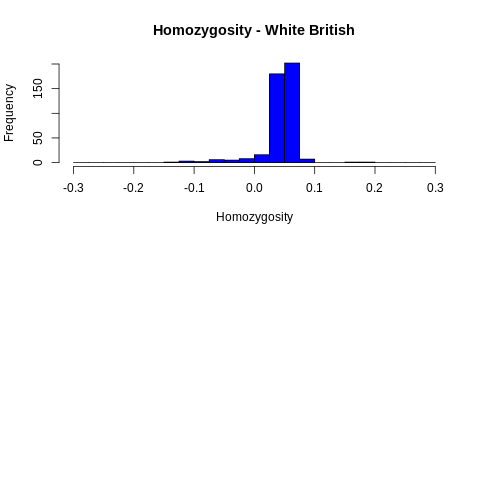

In [13]:
%%R
par(mfrow=c(2,1))
hist(hetph[!is.na(hetph[,7])&hetph[,7]=="White - British",6],main="Homozygosity - White British",breaks=seq(from=-0.3,to=0.3,by=0.025),xlab="Homozygosity",col="blue",xlim=c(-0.3,0.3))


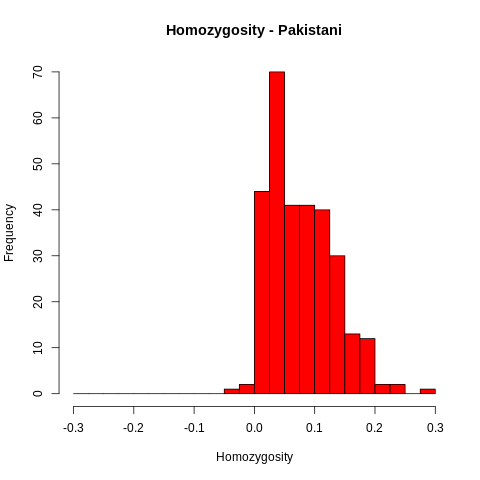

In [14]:
%%R
hist(hetph[!is.na(hetph[,7])&hetph[,7]=="Asian - Pakistani",6],main="Homozygosity - Pakistani",breaks=seq(from=-0.3,to=0.3,by=0.025),xlab="Homozygosity",col="red",xlim=c(-0.3,0.3))

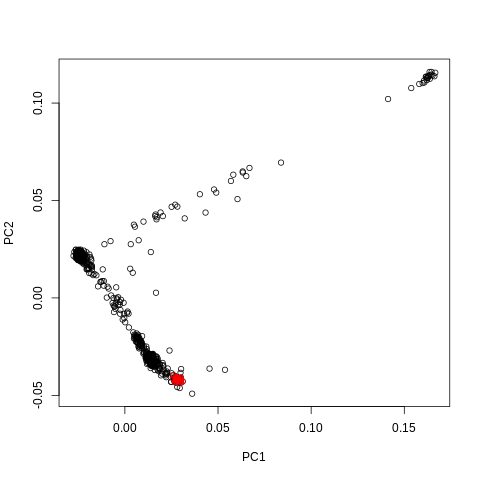

In [13]:
%%R
#The other thing we want to check is ethnicity
#We can do this by identifying those genetic variants that are most variable (in frequency) in our sample
#These are liklely to reflect ethnic diversity
#We can sum these many small differences and use this to predict what ethnic group someone is from

#pca<-read.table(file="/Users/medimm/Desktop/mexico/runanalyses/testplink.eigenvec",header=FALSE)
#names(pca)[c(1,3,4)]<-c("IID","PC1","PC2")
#pcaph<-merge(pca[,c(1,3,4)],ph)

#write.table(pcaph,file="/Users/medimm/Desktop/mexico/runanalyses/testplink_ph.eigenvec",col.names=TRUE,row.names=F,quote=F,sep="\t")

pcaph<-read.table(file="pm_workshop/testplink_ph.eigenvec",header=TRUE,sep="\t")


par(mfrow=c(1,1))
plot(pcaph[,2],pcaph[,3],xlab="PC1",ylab="PC2")

points(pcaph[pcaph[,4]=="Asian - Bangladeshi",2],pcaph[pcaph[,4]=="Asian - Bangladeshi",3],col="red")
#points(pcaph[pcaph[,4]=="Asian - Indian",2],pcaph[pcaph[,4]=="Asian - Indian",3],col="red")
#points(pcaph[pcaph[,4]=="Asian - Pakistani",2],pcaph[pcaph[,4]=="Asian - Pakistani",3],col="red")
#points(pcaph[pcaph[,4]=="Black - African",2],pcaph[pcaph[,4]=="Black - African",3],col="red")
#points(pcaph[pcaph[,4]=="Other",2],pcaph[pcaph[,4]=="Other",3],col="red")
#points(pcaph[pcaph[,4]=="White - British",2],pcaph[pcaph[,4]=="White - British",3],col="green")
#points(pcaph[pcaph[,4]=="White - Other",2],pcaph[pcaph[,4]=="White - Other",3],col="red")

#Possible colours: red, green, blue, yellow, magenta, purple, grey


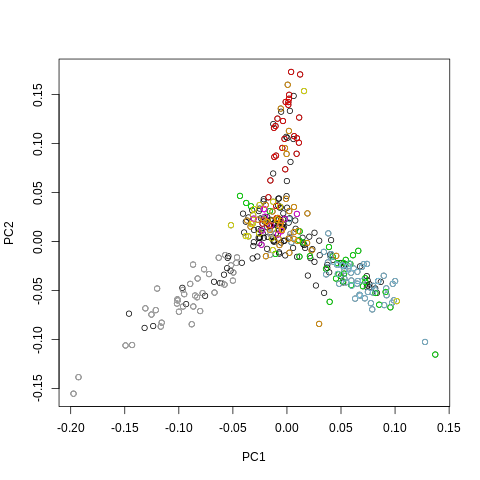

In [14]:
%%R
#We can do the same thing for south Asian samples (Pakistani ethnicity)
#Then look at how this reflects biraderi (clan) structure

#pca2<-read.table(file="/Users/medimm/Desktop/mexico/runanalyses/testplinksasian.eigenvec",header=FALSE)

#names(pca2)[c(1,3,4)]<-c("IID","PC1","PC2")
#pca2ph<-merge(pca2[,c(1,3,4)],ph)

#write.table(pca2ph,file="/Users/medimm/Desktop/mexico/runanalyses/testplinkasian_ph.eigenvec",col.names=TRUE,row.names=F,quote=F,sep="\t")

pca2ph<-read.table(file="pm_workshop/testplinkasian_ph.eigenvec",header=TRUE,sep="\t")

plot(pca2ph[,2],pca2ph[,3],xlab="PC1",ylab="PC2")

#There seems to be separation of groups here

points(pca2ph[pca2ph[,5]=="Bains",2],pca2ph[pca2ph[,5]=="Bains",3],col="red")
points(pca2ph[pca2ph[,5]=="Choudhry",2],pca2ph[pca2ph[,5]=="Choudhry",3],col="green")
points(pca2ph[pca2ph[,5]=="Jatt",2],pca2ph[pca2ph[,5]=="Jatt",3],col="skyblue")
points(pca2ph[pca2ph[,5]=="Kashmiri",2],pca2ph[pca2ph[,5]=="Kashmiri",3],col="yellow")
points(pca2ph[pca2ph[,5]=="Mughal",2],pca2ph[pca2ph[,5]=="Mughal",3],col="magenta")
points(pca2ph[pca2ph[,5]=="Pathan",2],pca2ph[pca2ph[,5]=="Pathan",3],col="grey")
points(pca2ph[pca2ph[,5]=="Rajput",2],pca2ph[pca2ph[,5]=="Rajput",3],col="orange")

In [ ]:
#Most participants give their region of origin (parents/grandparents) as Mirpur.
#Pathan (grey) are quite distinct and geogrpahically come from a different part of Pakistan.
#Jatt (sky blue) and Choudhry (green) seem to overlap completely.
#â€˜Choudhryâ€™ is an honorary title in Punjab and Kashmir used most commonly by the Jatts.
#Bains (red) is somewhat separate to others, while Rajput overlpas both Bain and Jatt/Choudhry.
#It could be that Rajput has different subgroups or that it is a title taken on by people with different ancestry.

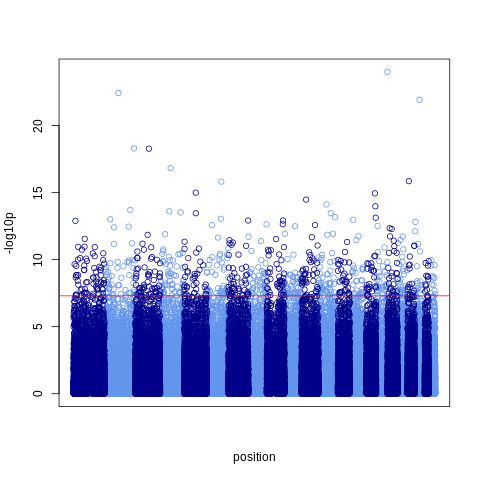

In [17]:
%%R
#The main reason we're concerned with ethnicity is 'confounding'
#We conduct tests comparing the frequency of markers in cases and controls
#Any variant that is far more frequent in cases than controls is said to be 'associated' with disease

reslog<-read.table(file="pm_workshop/testplinkallWITHCUMPOS.assoc.logistic",header=TRUE)


plot(reslog[round(0.5*reslog[,1])==0.5*reslog[,1],10],-log10(reslog[round(0.5*reslog[,1])==0.5*reslog[,1],9]),col="cornflowerblue",xlim=c(min(reslog[,10],na.rm=T),max(reslog[,10],na.rm=T)),xaxt="n",xlab="position",ylab="-log10p")
points(reslog[round(0.5*reslog[,1])!=0.5*reslog[,1],10],-log10(reslog[round(0.5*reslog[,1])!=0.5*reslog[,1],9]),col="darkblue")

abline(h=-log10(5*(10^(-8))),col="red")

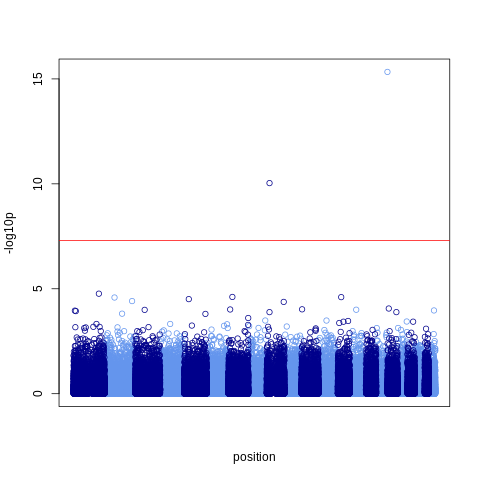

In [18]:
%%R
#But what if you collect cases from one country and controls from another?
#Any variant that is more frequent in cases than controls is also more frequent in one country than another
#We don't know whether this is due to the variant being more frequent in cases or more freuent in one country than the other

#Let's look at how case frequency differs by ethnicity:
table(pcaph[,c(4,7)])

#All the cases are in 'white British' samples (it's melanoma!)

#So let try looking at the results when we just have white British samples:

reslog2<-read.table(file="pm_workshop/testplinkall2WITHCUMPOS.assoc.logistic",header=TRUE)


plot(reslog2[round(0.5*reslog2[,1])==0.5*reslog2[,1],10],-log10(reslog2[round(0.5*reslog2[,1])==0.5*reslog2[,1],9]),col="cornflowerblue",xlim=c(min(reslog2[,10],na.rm=T),max(reslog2[,10],na.rm=T)),xaxt="n",xlab="position",ylab="-log10p")
points(reslog2[round(0.5*reslog2[,1])!=0.5*reslog2[,1],10],-log10(reslog2[round(0.5*reslog2[,1])!=0.5*reslog2[,1],9]),col="darkblue")

abline(h=-log10(5*(10^(-8))),col="red")

In [21]:
%%R
#If we look at the results:

reslog2[!is.na(reslog2[,9])&reslog2[,9]<0.000001,]

      CHR           SNP       BP A1 TEST NMISS      OR   STAT         P
43014   9 GSA-rs7866787 21760639  A  ADD   422  0.1157 -9.782 1.351e-22
43016   9 GSA-rs4478653 21853221  G  ADD   421  2.9220  6.479 9.225e-11
69901  16      rs258322 89755903  A  ADD   422 35.9200  8.121 4.634e-16
             V10
43014 1559514533
43016 1559607115
69901 2497323689
